In [70]:
"""

Author : Jainam Shah

Project Name : Adult Income Census
    
Objective : Income Census Category by age and sex

"""

'\n\nAuthor : Jainam Shah\n\nProject Name : Adult Income Census\n    \nObjective : Income Census Category Male/Female\n\n'

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [122]:
cd C:\Users\Jammy\OneDrive\Desktop\Data analysis PDFs\Datas to practice\Adult Census Income

C:\Users\Jammy\OneDrive\Desktop\Data analysis PDFs\Datas to practice\Adult Census Income


In [123]:
adt = pd.read_csv("adult.csv")
adt.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [124]:
adt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [125]:
adt.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [126]:
adt.workclass.unique() #here we can see the "?" is a unique value which can be classified as an

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [127]:
adt = adt.replace("?",np.NaN)


In [128]:
adt.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

###### As "?" an unique value has been replaced with np.NaN we can see columns : workclass,occupation,native.country have null values

### Data cleaning

##### Column WorkClass

In [129]:
adt["workclass"].mode()

0    Private
dtype: object

In [130]:
adt[adt.workclass == "Private"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [131]:
adt["workclass"] = adt["workclass"].fillna(adt["workclass"].mode()[0])

In [132]:
adt.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

#### Column Occupation

In [133]:
adt.occupation.unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [134]:
adt.occupation.nunique()

14

In [135]:
adt.occupation.dtype

dtype('O')

In [136]:
adt.occupation.mode()

0    Prof-specialty
dtype: object

In [137]:
adt[adt.occupation == "Prof-specialty"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32512,50,Private,302372,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
32515,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K
32518,46,Private,42972,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,>50K
32535,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [138]:
adt["occupation"] = adt["occupation"].fillna(adt["occupation"].mode()[0])

In [139]:
adt["occupation"].isnull().sum()

0

#### Column native.country

In [140]:
adt["native.country"].dtype

dtype('O')

In [141]:
adt["native.country"].unique()
adt["native.country"].nunique()

41

In [142]:
adt["native.country"].mode()

0    United-States
dtype: object

In [143]:
adt["native.country"] = adt["native.country"].fillna(adt["native.country"].mode()[0])

In [144]:
adt.occupation.isnull().sum()

0

In [145]:
adt.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

#### Column Income

In [146]:
adt.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [147]:
irange = list(adt["income"])
irange

['<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '>50K',
 '<=50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '<=50K',
 '>50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',

In [148]:
adt.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#### Graphical Analysis

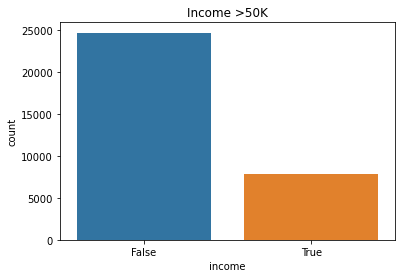

In [149]:
sns.countplot(adt["income"] == ">50K")
plt.title("Income >50K")
plt.show()

#### Capital Loss incured more by Male/Female

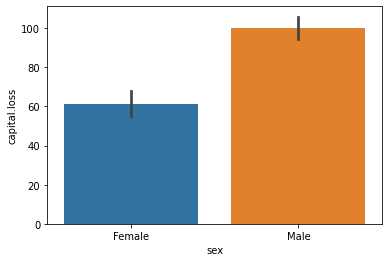

In [150]:
sns.barplot(x = "sex",y = "capital.loss",data = adt)
plt.show()

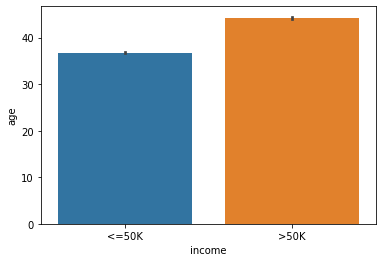

In [151]:
sns.barplot(x = "income",y = "age",data = adt)
plt.show()

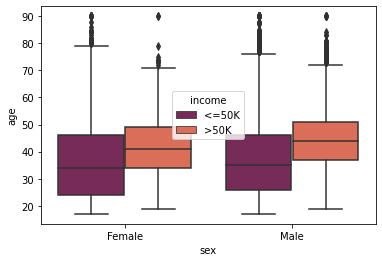

In [152]:
sns.boxplot(x = "sex",y = "age",hue ="income",data = adt,palette = "rocket")
plt.show()

In [153]:
adt.describe() 

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [154]:
adt.to_csv("Adult_CensusEDA.csv",index = False)

In [155]:
import os
os.getcwd()

'C:\\Users\\Jammy\\OneDrive\\Desktop\\Data analysis PDFs\\Datas to practice\\Adult Census Income'

#### Scaling

In [156]:
from sklearn.preprocessing import MinMaxScaler

In [157]:
scal_adt = MinMaxScaler()

In [158]:
new_adt = adt

In [159]:
new_adt[["age","education.num","capital.gain","capital.loss","hours.per.week"]] = scal_adt.fit_transform(new_adt[["age","education.num","capital.gain","capital.loss","hours.per.week"]])

In [160]:
new_adt.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,Private,77053,HS-grad,0.533333,Widowed,Prof-specialty,Not-in-family,White,Female,0.0,1.000000,0.397959,United-States,<=50K
1,0.890411,Private,132870,HS-grad,0.533333,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,1.000000,0.173469,United-States,<=50K
2,0.671233,Private,186061,Some-college,0.600000,Widowed,Prof-specialty,Unmarried,Black,Female,0.0,1.000000,0.397959,United-States,<=50K
3,0.506849,Private,140359,7th-8th,0.200000,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.895317,0.397959,United-States,<=50K
4,0.328767,Private,264663,Some-college,0.600000,Separated,Prof-specialty,Own-child,White,Female,0.0,0.895317,0.397959,United-States,<=50K


In [161]:
new_adt.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,1.897784e+05,0.605379,0.010777,0.020042,0.402423
std,0.186855,1.055500e+05,0.171515,0.073854,0.092507,0.125994
min,0.000000,1.228500e+04,0.000000,0.000000,0.000000,0.000000
25%,0.150685,1.178270e+05,0.533333,0.000000,0.000000,0.397959
50%,0.273973,1.783560e+05,0.600000,0.000000,0.000000,0.397959
75%,0.424658,2.370510e+05,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.484705e+06,1.000000,1.000000,1.000000,1.000000


#### Encoding

In [162]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [163]:
new_adt.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

#### Label Encoding

In [164]:
lr = LabelEncoder()

In [165]:
new_adt[['workclass','education','marital.status','relationship','race','native.country','income']] = new_adt[['workclass','education','marital.status','relationship','race','native.country','income']].apply(lr.fit_transform)

In [166]:
new_adt.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,3,77053,11,0.533333,6,Prof-specialty,1,4,Female,0.0,1.000000,0.397959,38,0
1,0.890411,3,132870,11,0.533333,6,Exec-managerial,1,4,Female,0.0,1.000000,0.173469,38,0
2,0.671233,3,186061,15,0.600000,6,Prof-specialty,4,2,Female,0.0,1.000000,0.397959,38,0
3,0.506849,3,140359,5,0.200000,0,Machine-op-inspct,4,4,Female,0.0,0.895317,0.397959,38,0
4,0.328767,3,264663,15,0.600000,5,Prof-specialty,3,4,Female,0.0,0.895317,0.397959,38,0


#### ONE-HOT Encoding

In [167]:
new_adt = pd.get_dummies(new_adt,columns = ["occupation","sex"],prefix = ["occ","sex_"])

In [168]:
new_adt.head()

,age,workclass,fnlwgt,education,education.num,marital.status,relationship,race,capital.gain,capital.loss,...,occ_Machine-op-inspct,occ_Other-service,occ_Priv-house-serv,occ_Prof-specialty,occ_Protective-serv,occ_Sales,occ_Tech-support,occ_Transport-moving,sex__Female,sex__Male
0,1.000000,3,77053,11,0.533333,6,1,4,0.0,1.000000,...,0,0,0,1,0,0,0,0,1,0
1,0.890411,3,132870,11,0.533333,6,1,4,0.0,1.000000,...,0,0,0,0,0,0,0,0,1,0
2,0.671233,3,186061,15,0.600000,6,4,2,0.0,1.000000,...,0,0,0,1,0,0,0,0,1,0
3,0.506849,3,140359,5,0.200000,0,4,4,0.0,0.895317,...,1,0,0,0,0,0,0,0,1,0
4,0.328767,3,264663,15,0.600000,5,3,4,0.0,0.895317,...,0,0,0,1,0,0,0,0,1,0


In [171]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression

In [169]:
new_adt.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'relationship', 'race', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income',
       'occ_Adm-clerical', 'occ_Armed-Forces', 'occ_Craft-repair',
       'occ_Exec-managerial', 'occ_Farming-fishing', 'occ_Handlers-cleaners',
       'occ_Machine-op-inspct', 'occ_Other-service', 'occ_Priv-house-serv',
       'occ_Prof-specialty', 'occ_Protective-serv', 'occ_Sales',
       'occ_Tech-support', 'occ_Transport-moving', 'sex__Female', 'sex__Male'],
      dtype='object')

In [182]:
new_adt.shape

(32561, 29)

In [170]:
X = new_adt[['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'relationship', 'race', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 
       'occ_Adm-clerical', 'occ_Armed-Forces', 'occ_Craft-repair',
       'occ_Exec-managerial', 'occ_Farming-fishing', 'occ_Handlers-cleaners',
       'occ_Machine-op-inspct', 'occ_Other-service', 'occ_Priv-house-serv',
       'occ_Prof-specialty', 'occ_Protective-serv', 'occ_Sales',
       'occ_Tech-support', 'occ_Transport-moving', 'sex__Female', 'sex__Male']]#independent columns

y = new_adt.income

In [172]:
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [173]:
fit1 = bestfeatures.fit(X,y)

In [175]:
dfscores = pd.DataFrame(fit1.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [176]:
dfscores

,0
0,210.621483
1,0.093544
2,171147.682865
3,297.942270
4,177.725050
5,1123.469818
6,3659.143125
7,33.031305
8,821.932891
9,315.001352


In [177]:
dfcolumns

,0
0,age
1,workclass
2,fnlwgt
3,education
4,education.num
5,marital.status
6,relationship
7,race
8,capital.gain
9,capital.loss


In [178]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores

,0,0
0,age,210.621483
1,workclass,0.093544
2,fnlwgt,171147.682865
3,education,297.942270
4,education.num,177.725050
5,marital.status,1123.469818
6,relationship,3659.143125
7,race,33.031305
8,capital.gain,821.932891
9,capital.loss,315.001352


#### Train/Test Split

In [179]:
C = new_adt[['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'relationship', 'race', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 
       'occ_Adm-clerical', 'occ_Armed-Forces', 'occ_Craft-repair',
       'occ_Exec-managerial', 'occ_Farming-fishing', 'occ_Handlers-cleaners',
       'occ_Machine-op-inspct', 'occ_Other-service', 'occ_Priv-house-serv',
       'occ_Prof-specialty', 'occ_Protective-serv', 'occ_Sales',
       'occ_Tech-support', 'occ_Transport-moving', 'sex__Female', 'sex__Male']]

D = new_adt.income

In [181]:
C.shape

(32561, 28)

In [183]:
D.shape

(32561,)

In [184]:
D.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(C,D,train_size=0.7)

#### Model Logistic Regression/Classification

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [194]:
model.score(X_train,Y_train)

0.7576342576342576

In [195]:
model.score(X_test,Y_test)

0.7628211690039922

In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [197]:
model = [DecisionTreeClassifier, SVC,RandomForestClassifier,KNeighborsClassifier,GaussianNB]

for mod in model:
    reg = mod()
    reg = reg.fit(X_train,Y_train)
    print(mod , 'accuracy',reg.score(X_test,Y_test))

<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy 0.8072474152932746
<class 'sklearn.svm._classes.SVC'> accuracy 0.7628211690039922
<class 'sklearn.ensemble._forest.RandomForestClassifier'> accuracy 0.8588391851776026
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> accuracy 0.7210564029071553
<class 'sklearn.naive_bayes.GaussianNB'> accuracy 0.7628211690039922


###### Random Forest Classifier has better accuracy score of them all.

In [198]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)

In [199]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [200]:
def forest(model_rf, X_train, Y_train, X_test, Y_test):
    model_rf.fit(X_train,Y_train.ravel())
    Y_pred = model_rf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print("pricison_score: ",precision_score(Y_test, Y_pred))
    print("recall_score: ",recall_score(Y_test, Y_pred))
    print("Accuracy = {}".format(accuracy))
    print(classification_report(Y_test,Y_pred,digits=5))
    print(confusion_matrix(Y_test,Y_pred))
    
forest(model_rf,X_train, Y_train, X_test, Y_test)

pricison_score:  0.7717215326497572
recall_score:  0.6171773845489857
Accuracy = 0.8659023441498618
              precision    recall  f1-score   support

           0    0.88795   0.94324   0.91476      7452
           1    0.77172   0.61718   0.68585      2317

    accuracy                        0.86590      9769
   macro avg    0.82983   0.78021   0.80030      9769
weighted avg    0.86038   0.86590   0.86047      9769

[[7029  423]
 [ 887 1430]]
